<a href="https://colab.research.google.com/github/dkyos/data-analysis/blob/master/word2vec_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------
['king strong man', 'queen wise woman', 'boy young man', 'girl young woman', 'prince young king', 'princess young queen', 'man strong', 'woman pretty', 'prince boy king', 'princess girl queen']
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
--------------------
['king strong man', 'queen wise woman', 'boy young man', 'girl young woman', 'prince young king', 'princess young queen', 'man strong', 'woman pretty', 'prince boy king', 'princess girl queen']
[['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['boy', 'young', 'man'], ['girl', 'young', 'woman'], ['prince', 'young', 'king'], ['princess', 'young', 'queen'], ['man', 'strong'], ['woman', 'pretty'], ['prince', 'boy', 'king'], ['princess', 'girl', 'queen']]
Word2Vec(vocab=12, size=200, alpha=0.025)
['king', 'strong', 'man', 'queen', 'wise', 'woman', 'boy', 'young', 'girl', 'prince', 'princess', 'pretty']
[ 1.28597452e-03  5.58781496e-04  7.14716

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:88: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:104: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0,

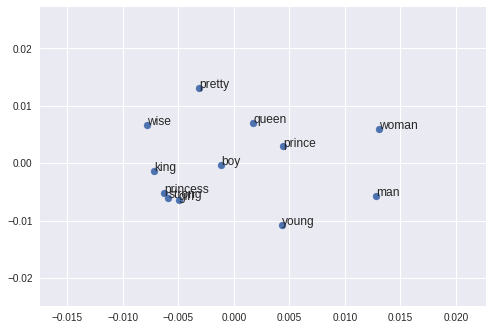

In [1]:
# https://www.youtube.com/watch?v=sY4YyacSsLc
# https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/nlp/word2vec_tensorflow.ipynb
# from https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

# https://radimrehurek.com/gensim/models/word2vec.html
# For reproducibility between interpreter launches
#  - word2vec with seed value & workers = 1
#  - In Python 3, requires use of the PYTHONHASHSEED environment 
#    - ex: export PYTHONHASHSEED=777

import sys
from gensim.models import Word2Vec

corpus = ['king is a strong man',
          'queen is a wise woman',
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong',
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

tmp = remove_stop_words(corpus)
print('-'*20)
print(tmp)

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stopWords = set(stopwords.words('english'))
def remove_stop_words_nltk(corpus):
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stopWords:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

tmp = remove_stop_words_nltk(corpus)
print('-'*20)
print(tmp)

corpus = tmp

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
print(sentences)

'''
sentences = [["king","strong","man"],
            ["queen","wise","woman"],
            ["boy","young","man"],
            ["girl","young","woman"],
            ["prince","young","king"],
            ["princess","young","queen"],
            ["man","strong"],
            ["woman","pretty"],
            ["prince","boy","king"],
            ["princess","girl","queen"]]
'''

# train model
model = Word2Vec(sentences
    , size = 200
    , min_count=1
    , window = 1
    , sg=1
    , seed = 777
    , workers = 1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['king'])

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)
result = model.most_similar("king")
print(result)

# save model
model.save('model.bin')
# load model
model = Word2Vec.load('model.bin')
print(model)

from sklearn.decomposition import PCA
from matplotlib import pyplot

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()